In [18]:
import pandas as pd
import warnings
import copy
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [12]:
# Read file

input_file = pd.read_csv('./Final_Files/test_1.csv')

# Shuffle data frame

input_file = input_file.sample(frac=1)
input_file.head()

,acousticness,analysis_url,danceability,duration_ms,energy,track_id,instrumentalness,key,liveness,loudness,...,tempo,time_signature,track_href,type,uri,valence,artist_name,track_name,popularity,bbhot
535,0.6530,https://api.spotify.com/v1/audio-analysis/7pdF...,0.735,157777,0.525,7pdF27mSDuPWhppnHAmWHa,0.918000,6,0.101,-2.939,...,160.147,4,https://api.spotify.com/v1/tracks/7pdF27mSDuPW...,audio_features,spotify:track:7pdF27mSDuPWhppnHAmWHa,0.369,XXXTENTACION,whoa (mind in awe),85,0
816,0.0133,https://api.spotify.com/v1/audio-analysis/0xGl...,0.795,134417,0.789,0xGl8HKFncXK7aFZRTGZsr,0.000000,2,0.113,-5.210,...,149.961,4,https://api.spotify.com/v1/tracks/0xGl8HKFncXK...,audio_features,spotify:track:0xGl8HKFncXK7aFZRTGZsr,0.535,Party in Backyard,Bitch Lasagna,79,0
927,0.1700,https://api.spotify.com/v1/audio-analysis/1YLf...,0.656,179411,0.616,1YLfaRr3QIW1fF3nvDO0gX,0.000000,5,0.219,-4.668,...,98.871,4,https://api.spotify.com/v1/tracks/1YLfaRr3QIW1...,audio_features,spotify:track:1YLfaRr3QIW1fF3nvDO0gX,0.269,Ella Mai,Whatchamacallit (feat. Chris Brown),76,0
619,0.0945,https://api.spotify.com/v1/audio-analysis/4hQ6...,0.601,207905,0.724,4hQ6UGyWQIGJmHSo0J88JW,0.000002,6,0.120,-4.856,...,102.061,4,https://api.spotify.com/v1/tracks/4hQ6UGyWQIGJ...,audio_features,spotify:track:4hQ6UGyWQIGJmHSo0J88JW,0.508,Selena Gomez,Back To You - From 13 Reasons Why ‚Äì Season 2...,84,0
486,0.3820,https://api.spotify.com/v1/audio-analysis/78G8...,0.366,272739,0.337,78G8Zeg1T9ASAyCiRGG75N,0.000000,5,0.139,-5.984,...,126.661,4,https://api.spotify.com/v1/tracks/78G8Zeg1T9AS...,audio_features,spotify:track:78G8Zeg1T9ASAyCiRGG75N,0.061,Ella Mai,Easy,59,1


In [13]:
## Dropping fields (strings/objects)

'''
drop_list = ['analysis_url','track_id', 'track_href', 'type', 'uri', 
             'artist_name', 'track_name']
'''
drop_list = ['analysis_url','track_id', 'track_href', 'type', 'uri', 
             'artist_name', 'track_name', 'mode', 'key', 'time_signature']

train = input_file.drop(drop_list, axis = 1)

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 941 entries, 535 to 136
Data columns (total 12 columns):
acousticness        941 non-null float64
danceability        941 non-null float64
duration_ms         941 non-null int64
energy              941 non-null float64
instrumentalness    941 non-null float64
liveness            941 non-null float64
loudness            941 non-null float64
speechiness         941 non-null float64
tempo               941 non-null float64
valence             941 non-null float64
popularity          941 non-null int64
bbhot               941 non-null int64
dtypes: float64(9), int64(3)
memory usage: 95.6 KB


In [14]:
## Making a copy of dataframe target variable and assigning it to Y
Y = copy.deepcopy(train.bbhot)
Y.shape

(941,)

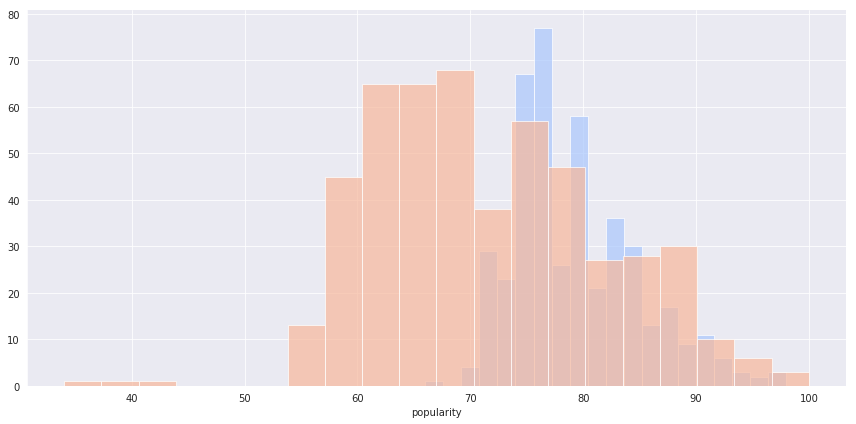

In [20]:
sns.set_style('darkgrid')
g = sns.FacetGrid(train,hue="bbhot",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'popularity',bins=20,alpha=0.7)

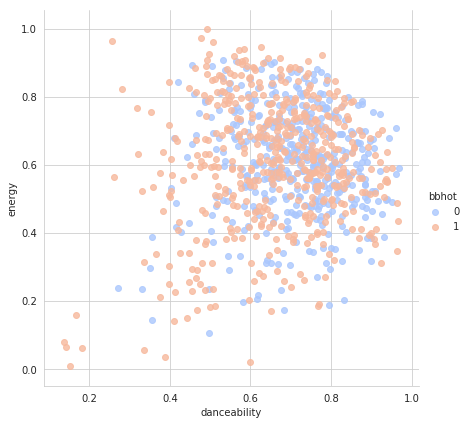

In [16]:
sns.set_style('whitegrid')
sns.lmplot('danceability','energy',data=train, hue='bbhot',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

In [22]:
# Implement Kmeans

from sklearn.cluster import KMeans

In [23]:
kmeans = KMeans(n_clusters=2)

In [39]:
## Fitting everything to the model except bbhot label

kmeans.fit(train.drop('bbhot',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [40]:
## What are the cluster center vectors

kmeans.cluster_centers_


array([[ 2.59631073e-01,  6.96339431e-01,  1.70054047e+05,
         5.95975163e-01,  3.75257677e-02,  1.65941057e-01,
        -6.84562398e+00,  1.41754268e-01,  1.21879114e+02,
         4.70378049e-01,  7.50752033e+01,  0.00000000e+00],
       [ 2.35784708e-01,  6.64118040e-01,  2.32943486e+05,
         6.15679065e-01,  1.78148752e-02,  1.58973942e-01,
        -6.46283519e+00,  1.18960802e-01,  1.23348535e+02,
         4.07195768e-01,  7.51959911e+01,  0.00000000e+00]])

In [41]:
## Create a new column for df called 'Cluster', which is a 1 for a hot song, and a 0 for a not so hot song.**

def converter(cluster):
    if cluster=='1':
        return 1
    else:
        return 0

In [42]:
train['Cluster'] = train['bbhot'].apply(converter)

In [43]:
train.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,bbhot,Cluster
535,0.6530,0.735,157777,0.525,0.918000,0.101,-2.939,0.0441,160.147,0.369,85,0,0
816,0.0133,0.795,134417,0.789,0.000000,0.113,-5.210,0.2590,149.961,0.535,79,0,0
927,0.1700,0.656,179411,0.616,0.000000,0.219,-4.668,0.0392,98.871,0.269,76,0,0
619,0.0945,0.601,207905,0.724,0.000002,0.120,-4.856,0.0486,102.061,0.508,84,0,0
486,0.3820,0.366,272739,0.337,0.000000,0.139,-5.984,0.0315,126.661,0.061,59,1,0


In [44]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(train['Cluster'],kmeans.labels_))
print(classification_report(train['Cluster'],kmeans.labels_))

[[492 449]
 [  0   0]]
              precision    recall  f1-score   support

           0       1.00      0.52      0.69       941
           1       0.00      0.00      0.00         0

   micro avg       0.52      0.52      0.52       941
   macro avg       0.50      0.26      0.34       941
weighted avg       1.00      0.52      0.69       941

